In [16]:
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from yellowbrick.classifier import ConfusionMatrix

In [6]:
with open('merge.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [7]:
modelo = RandomForestClassifier()

In [8]:
param_dist = {
    "n_estimators": randint(10, 200),
    "max_depth": randint(1, 20),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "max_features": ["auto", "sqrt", "log2", None],
    "bootstrap": [True, False]
}
random_search = RandomizedSearchCV(modelo, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_treino, y_treino)

c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
125 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\skle

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000251B8B28310>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000251B8BAE290>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000251B8B58FA0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000251B8C66A40>},
                   random_state=42)

In [9]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 17,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 13,
 'n_estimators': 122}

In [13]:
modelo = RandomForestClassifier(n_estimators=random_search.best_params_['n_estimators'],
                                       max_depth=random_search.best_params_['max_depth'],
                                       min_samples_split=random_search.best_params_['min_samples_split'],
                                       min_samples_leaf=random_search.best_params_['min_samples_leaf'],
                                       max_features=random_search.best_params_['max_features'],
                                       bootstrap=random_search.best_params_['bootstrap'])
modelo.fit(X_treino,y_treino)

RandomForestClassifier(bootstrap=False, max_depth=17, max_features='log2',
                       min_samples_leaf=5, min_samples_split=13,
                       n_estimators=122)

0.870756646216769

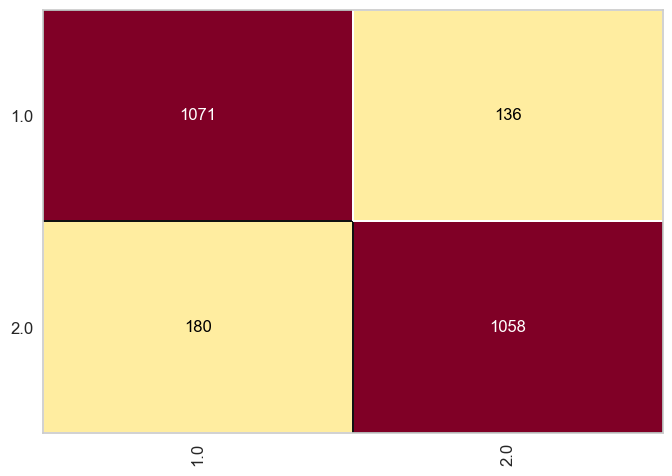

In [17]:
previsoes = modelo.predict(X_teste)
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [15]:
accuracy = modelo.score(X_teste, y_teste)
accuracy

0.870756646216769